In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load our pre-split data
data = joblib.load('../Results/split_data.joblib')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# This is the list of top 20 features  generated in the previous notebook
# (This is an example list; might be slightly different)
top_20_features = [
    'original_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterSlice', 
    'original_glszm_GrayLevelNonUniformity', 'original_glcm_Idn', 
    'original_glcm_Idmn', 'original_glszm_SmallAreaEmphasis', 
    'original_gldm_DependenceNonUniformityNormalized', 'original_glcm_Imc2', 
    'original_glszm_SizeZoneNonUniformity', 'original_glcm_InverseVariance', 
    'original_shape_Sphericity', 'original_gldm_DependenceEntropy', 
    'original_firstorder_Median', 'original_glcm_ClusterShade', 
    'original_firstorder_Entropy', 'original_glcm_Correlation', 
    'original_glszm_LargeAreaEmphasis', 'original_glcm_Autocorrelation', 
    'original_firstorder_10Percentile', 'original_gldm_GrayLevelNonUniformity'
]


# Filter training and testing sets to include ONLY these top features
X_train_selected = X_train[top_20_features]
X_test_selected = X_test[top_20_features]

print("Data loaded and filtered to top 20 features.")
print(f"New training set shape: {X_train_selected.shape}")


Data loaded and filtered to top 20 features.
New training set shape: (336, 20)


In [17]:
# Initialize the Random Forest Classifier
rf_model_optimized = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

# Train the model on the selected features
print("Training the optimized Random Forest model...")
rf_model_optimized.fit(X_train_selected, y_train)
print("Model training complete.")


Training the optimized Random Forest model...
Model training complete.


--- Classification Report (Optimized Model) ---
              precision    recall  f1-score   support

           0       0.63      0.72      0.67        50
           1       0.48      0.38      0.43        34

    accuracy                           0.58        84
   macro avg       0.56      0.55      0.55        84
weighted avg       0.57      0.58      0.57        84


--- Confusion Matrix (Optimized Model) ---
                Predicted: 0 | Predicted: 1
Actual: 0      36            | 14           
Actual: 1      21            | 13           

Baseline ROC AUC Score: 0.5532
Optimized ROC AUC Score: 0.5141

Plotting ROC Curve...


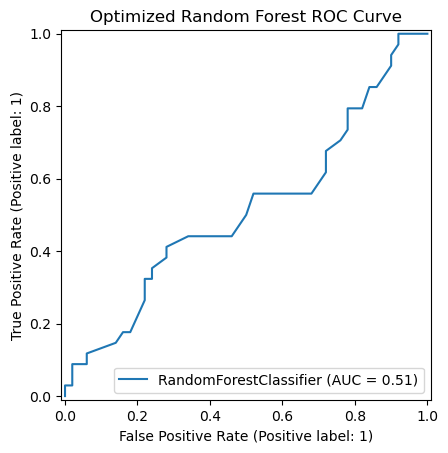

In [18]:
# Make predictions on the selected test set features
y_pred = rf_model_optimized.predict(X_test_selected)
y_pred_proba = rf_model_optimized.predict_proba(X_test_selected)[:, 1]

# --- Evaluation ---
print("--- Classification Report (Optimized Model) ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix (Optimized Model) ---")
cm = confusion_matrix(y_test, y_pred)
print("                Predicted: 0 | Predicted: 1")
print(f"Actual: 0      {cm[0,0]:<13} | {cm[0,1]:<13}")
print(f"Actual: 1      {cm[1,0]:<13} | {cm[1,1]:<13}")

roc_auc_optimized = roc_auc_score(y_test, y_pred_proba)
print(f"\nBaseline ROC AUC Score: 0.5532")
print(f"Optimized ROC AUC Score: {roc_auc_optimized:.4f}")

# Plot the ROC Curve
print("\nPlotting ROC Curve...")
RocCurveDisplay.from_estimator(rf_model_optimized, X_test_selected, y_test)
plt.title('Optimized Random Forest ROC Curve')
plt.show()
